$$
x[n] = A\sin([2 \pi \cdot f n ] + \phi)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io.wavfile import write as
import scipy

In [2]:
# Signal Params contains the parameters for each of the 3 signals [(amplitude, frequencies), ...]
signal_params = [(0.5, 1000), (0.25, 2000), (0.25, 2020)]

In [3]:
SAMPLE_RATE = 16_000
DURATION = 2
FILE_NAME = "section_2_DFT.wav"

In [5]:
timeAxis = np.linspace(0, 2, SAMPLE_RATE*DURATION)

# We have a sum of the frequencies that form the signal x[n]
list_of_signals = np.array([amp*np.sin(2*np.pi*freq*timeAxis)
                           for amp, freq in signal_params])

# we sum up the signals to create one signal
x = np.sum(list_of_signals, axis=0)

In [6]:
scipy.io.wavfile.write(FILE_NAME, SAMPLE_RATE, x)

In [4]:
samplerate, data = scipy.io.wavfile.read(FILE_NAME)

In [27]:
X = scipy.fft.fft(data)

X = X[:SAMPLE_RATE//2]

$$ |z| = \sqrt{a^2 + b^2}

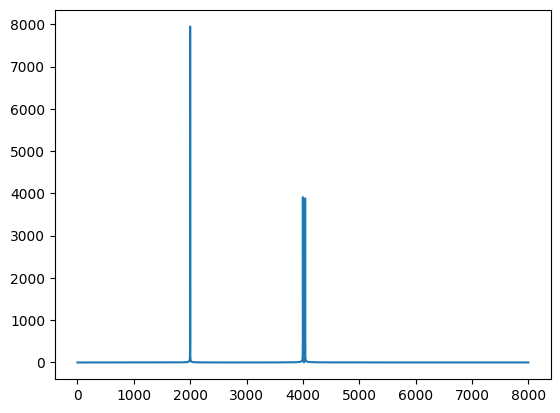

In [28]:
z = np.abs(X)

# plt.plot(X)
plt.plot(z)

$$ \phi = \arctan(\frac{complex}{real})

In [7]:
a = X.real
b = X.imag

In [17]:
phi = np.arctan2(b, a)
phi = phi[:SAMPLE_RATE//2]

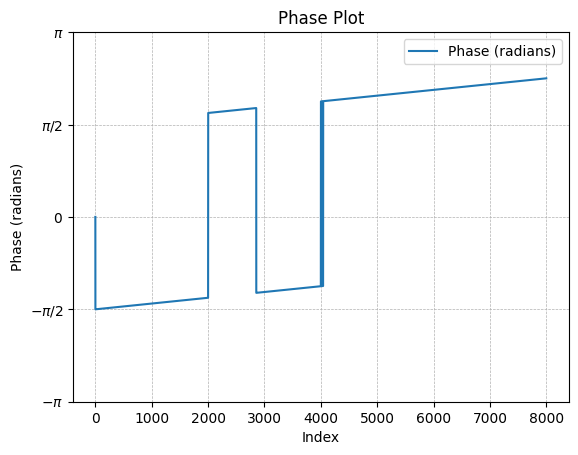

In [21]:
plt.plot(phi, label="Phase (radians)")

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Adjust y-axis to show ticks as multiples of π/2
plt.yticks(
    ticks=np.arange(-np.pi, np.pi + np.pi/2, np.pi/2),  # Tick positions
    labels=[
        r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"
    ]  # Corresponding labels
)

# Add labels and legend
plt.xlabel("Index")
plt.ylabel("Phase (radians)")
plt.legend()
plt.title("Phase Plot")

# Show the plot
plt.show()

In [9]:
def my_fft(x):
    

array([ 0.00000000e+00,  5.46292397e-01,  8.53531031e-01, ...,
       -8.53531031e-01, -5.46292397e-01, -1.68936464e-12], shape=(32000,))

$$x[n]=\frac{\sum*{t}x*{t}[n]w[n-tH]}{\sum\_{t}w^{2}[n-tH]}


$$x\_{t}[n]=x[n]w[n-tH]
